In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.features import SpatialDataFrame
from arcgis.geometry import lengths,areas_and_lengths
import pandas as pd
import ipyvolume as ipv
import ipyvolume.pylab as p3
import ipywidgets as widgets
from IPython.display import display

# Create an anonymous connection to ArcGIS Online
gis = GIS("https://www.arcgis.com", "esrij2802", "2802esrij")

In [2]:
#日本橋トークビルの住所
location = arcgis.geocoding.geocode("東京都中央区日本橋本石町3-3-5")[0]

map1 = gis.map(location, zoomlevel=15)
map1.basemap = "satellite"
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=15.0)

In [3]:
map2 = gis.map(location, zoomlevel=18)
map2.basemap = "satellite"
map2

MapView(layout=Layout(height='400px', width='100%'), zoom=18.0)

https://osmbuildings.org/?lat=35.68812&lon=139.77051&zoom=18.4&tilt=30

In [4]:
# text box widget
widgets_boj = widgets.Text(value="東京都中央区日本橋本石町3-3-5", placeholder='Bank of Japan, Japan',
                            description='Location:', disabled=False)

geocode(widgets_boj.value)[0]

{'address': '東京都中央区日本橋本石町３-３-５',
 'location': {'x': 139.7712105, 'y': 35.68779000000001},
 'score': 100,
 'attributes': {'Loc_name': 'World',
  'Status': 'M',
  'Score': 100,
  'Match_addr': '東京都中央区日本橋本石町３-３-５',
  'LongLabel': '東京都中央区日本橋本石町３-３-５, JPN',
  'ShortLabel': '３-３-５',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'Place_addr': '東京都中央区日本橋本石町３-３-５',
  'Phone': '',
  'URL': '',
  'Rank': 20,
  'AddBldg': '',
  'AddNum': '５',
  'AddNumFrom': '',
  'AddNumTo': '',
  'AddRange': '',
  'Side': 'R',
  'StPreDir': '',
  'StPreType': '',
  'StName': '',
  'StType': '',
  'StDir': '',
  'BldgType': '',
  'BldgName': '',
  'LevelType': '',
  'LevelName': '',
  'UnitType': '',
  'UnitName': '',
  'SubAddr': '',
  'StAddr': '３-３-５',
  'Block': '３',
  'Sector': '',
  'Nbrhd': '３',
  'District': '日本橋本石町',
  'City': '',
  'MetroArea': '中央区',
  'Subregion': '',
  'Region': '東京都',
  'RegionAbbr': '東京都',
  'Territory': '',
  'Zone': '',
  'Postal': '1030021',
  'PostalExt': ''

In [5]:
'''
search_results1 = gis.content.search("title:World Imagery AND owner:esri", outside_org=True)
search_results1
'''
search_results = gis.content.search("owner:esri_osm AND type:feature layer", outside_org=True)
search_results

[<Item title:"OpenStreetMap Buildings (Beta)" type:Feature Layer Collection owner:esri_osm>,
 <Item title:"OpenStreetMap Roads (Beta)" type:Feature Layer Collection owner:esri_osm>,
 <Item title:"OpenStreetMap POIs (Beta)" type:Feature Layer Collection owner:esri_osm>]

<Item title:"OpenStreetMap Buildings (Beta)" type:Feature Layer Collection owner:esri_osm>
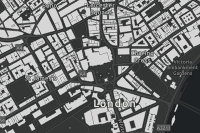

<Item title:"OpenStreetMap Roads (Beta)" type:Feature Layer Collection owner:esri_osm>
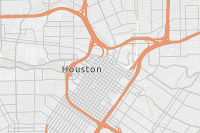

<Item title:"OpenStreetMap POIs (Beta)" type:Feature Layer Collection owner:esri_osm>
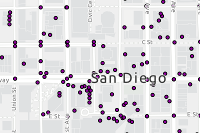

In [6]:
for item in search_results:
    display(item)

In [7]:
search_results[0].layers

[<FeatureLayer url:"https://osm.arcgisonline.com/arcgis/rest/services/OSM_Buildings/MapServer/0">]

<Item title:"OpenStreetMap Buildings (Beta)" type:Feature Layer Collection owner:esri_osm>
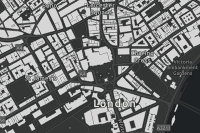

In [8]:
search_results[0]

In [9]:
feature_service_item = search_results[0]
feature_layer = feature_service_item.layers[0]

for f in feature_layer.properties.fields:
    print(f['name'])

way
building
name
height
levels
addrhousenum
addrhousename
addrstreet
addrcity
addrpostcode
addrstate
addrprovince
addrcountry
addrdistrict
addrsubdistrict
wikipedia
wikidata
objectid


In [10]:
arcgis.geocoding.geocode("東京都中央区日本橋本石町3-3-5")

[{'address': '東京都中央区日本橋本石町３-３-５',
  'location': {'x': 139.7712105, 'y': 35.68779000000001},
  'score': 100,
  'attributes': {'Loc_name': 'World',
   'Status': 'M',
   'Score': 100,
   'Match_addr': '東京都中央区日本橋本石町３-３-５',
   'LongLabel': '東京都中央区日本橋本石町３-３-５, JPN',
   'ShortLabel': '３-３-５',
   'Addr_type': 'PointAddress',
   'Type': '',
   'PlaceName': '',
   'Place_addr': '東京都中央区日本橋本石町３-３-５',
   'Phone': '',
   'URL': '',
   'Rank': 20,
   'AddBldg': '',
   'AddNum': '５',
   'AddNumFrom': '',
   'AddNumTo': '',
   'AddRange': '',
   'Side': 'R',
   'StPreDir': '',
   'StPreType': '',
   'StName': '',
   'StType': '',
   'StDir': '',
   'BldgType': '',
   'BldgName': '',
   'LevelType': '',
   'LevelName': '',
   'UnitType': '',
   'UnitName': '',
   'SubAddr': '',
   'StAddr': '３-３-５',
   'Block': '３',
   'Sector': '',
   'Nbrhd': '３',
   'District': '日本橋本石町',
   'City': '',
   'MetroArea': '中央区',
   'Subregion': '',
   'Region': '東京都',
   'RegionAbbr': '東京都',
   'Territory': '',
   'Zone'

In [11]:
location_jdd = arcgis.geocoding.geocode("東京都中央区日本橋本石町3-3-5")[0]
locations = location_jdd['location']

#wkid 4326：WGS 84というジオコーディングの結果で返却される緯度経度の座標系
#wkid 3857：Webメルカトル図法というArcGIS OnlineのWebマップで利用される座標系
#wkid 102618：国内でよく利用される平面直角座標系
point = arcgis.geometry.Point({"x": locations["x"], "y": locations["y"], "spatialReference" : {"wkid" : 4326}})
objects = arcgis.geometry.filters.intersects(point)

objects

{'geometry': {'x': 139.7712105,
  'y': 35.68779000000001,
  'spatialReference': {'wkid': 4326}},
 'geometryType': 'esriGeometryPoint',
 'spatialRel': 'esriSpatialRelIntersects',
 'inSR': {'wkid': 4326}}

In [12]:
feature = feature_layer.query(where='1=1', geometry_filter=objects)
feature

<FeatureSet> 1 features

In [13]:
sdf_feature = feature.sdf
display(sdf_feature)
print('床面積 ＝ {} 平方メートル'.format(sdf_feature.spatial.area))

,SHAPE,addrcity,addrcountry,addrdistrict,addrhousename,addrhousenum,addrpostcode,addrprovince,addrstate,addrstreet,addrsubdistrict,building,height,levels,name,objectid,wikidata,wikipedia
0,"{""rings"": [[[15559249.035499997, 4257757.00949...",None,None,None,None,None,None,None,None,None,None,yes,None,None,None,9839472,None,None


床面積 ＝ 638.4081337385948 平方メートル


In [14]:
'''
#objectIds=174757573, 常盤小学校
feature = feature_layer.query(where='objectid= 174757573')

sdf_feature = feature.sdf
display(sdf_feature)
print('床面積 ＝ {} 平方メートル'.format(sdf_feature.spatial.area))
'''

"\n#objectIds=174757573, 常盤小学校\nfeature = feature_layer.query(where='objectid= 174757573')\n\nsdf_feature = feature.sdf\ndisplay(sdf_feature)\nprint('床面積 ＝ {} 平方メートル'.format(sdf_feature.spatial.area))\n"

In [15]:
'''
feature = feature_layer.query(where='174757570 < objectid AND objectid < 174757575')

sdf_feature = feature.sdf
display(sdf_feature)
print('床面積 ＝ {} 平方メートル'.format(sdf_feature.spatial.area))
'''

"\nfeature = feature_layer.query(where='174757570 < objectid AND objectid < 174757575')\n\nsdf_feature = feature.sdf\ndisplay(sdf_feature)\nprint('床面積 ＝ {} 平方メートル'.format(sdf_feature.spatial.area))\n"